In [7]:

import numpy as np 
import pandas as pd 
import os
import cv2

## Labels

In [8]:
labels = os.listdir(r"archive\train")

In [9]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

## Visualize A random image

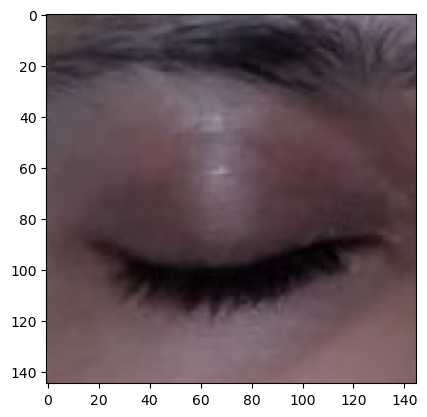

In [10]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"archive\train\Closed\_0.jpg"))

## Image array

In [11]:
a = plt.imread(r"archive\train\yawn\10.jpg")

## Image shape

In [12]:
a.shape

(480, 640, 3)

## Visualize yawn image(Background is unnecessary. We need only face image array) 


In [13]:
# plt.imshow(plt.imread(r"archive\train\yawn\10.jpg"))

## Take only face(For yawn and not_yawn)

In [14]:
# def face_for_yawn():
    
#     direc="archive/train/"
#     face_cas_path = "haarcascade_frontalface_default.xml"

    
#     yaw_no = []
#     IMG_SIZE = 145
#     categories = ["yawn", "no_yawn"]
    
#     for category in categories:
#         path_link = os.path.join(direc, category)
#         class_num1 = categories.index(category)
#         print(class_num1)
#         for image in os.listdir(path_link):
#             image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
#             face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#             faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
#             for (x, y, w, h) in faces:
#                 img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
#                 roi_color = img[y:y+h, x:x+w]
#                 resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
#                 yaw_no.append([resized_array, class_num1])
#     return yaw_no


# yawn_no_yawn = face_for_yawn()

## For Closed and Open eye

In [15]:
def get_data(dir_path=r"archive\train", face_cas=r"archive(1)\haarcascade_frontalface_default.xml", eye_cas=r"archive(1)\haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [16]:
data_train = get_data()

2
3


## Extend data and Convert array

In [17]:
def append_data():
#     total_data = []
#     yaw_no = face_for_yawn()
    data = get_data()
#     yaw_no.extend(data)
    return np.array(data)

## New variable to store

In [18]:
new_data = append_data()

2
3


C:\Users\HP\AppData\Local\Temp\ipykernel_17976\155762771.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


## Separate label and features

In [19]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

## Reshape the Array

In [20]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

## LabelBinarizer

In [21]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

## Label array

In [22]:
y = np.array(y)

## Train Test split

In [25]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

## Length of X_test

In [26]:
len(X_test)

436

## Import some dependencies

In [27]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

## Data Augmentation

In [28]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)


#train_generator = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#test_generator = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model

In [29]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(145,145,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [29]:
history = model.fit(train_generator, epochs=40, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
32/32 [==============================] - 138s 4s/step - loss: 983.2185 - accuracy: 0.2520 - val_loss: 3884.1741 - val_accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 127s 4s/step - loss: 110091.8750 - accuracy: 0.2451 - val_loss: 91309.1484 - val_accuracy: 0.5229
Epoch 3/50
32/32 [==============================] - 124s 4s/step - loss: 1818706.3750 - accuracy: 0.2835 - val_loss: 4975867.5000 - val_accuracy: 0.0000e+00
Epoch 4/50
32/32 [==============================] - 125s 4s/step - loss: 16335470.0000 - accuracy: 0.2490 - val_loss: 17926632.0000 - val_accuracy: 0.9472
Epoch 5/50
32/32 [==============================] - 124s 4s/step - loss: 77797728.0000 - accuracy: 0.2618 - val_loss: 267131392.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
32/32 [==============================] - 124s 4s/step - loss: 310217920.0000 - accuracy: 0.2470 - val_loss: 336902688.0000 - val_accuracy: 0.0000e+00
Epoch 7/50
32/32 [==============================] - 124s 4s/step - 

32/32 [==============================] - 131s 4s/step - loss: 115156931575808.0000 - accuracy: 0.2549 - val_loss: 250164547682304.0000 - val_accuracy: 0.0000e+00


## History

In [4]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

NameError: name 'history' is not defined

## Save Model

In [6]:
model.save("drowiness_model.h5")

NameError: name 'model' is not defined

# Prediction

In [85]:
prediction = np.argmax(model.predict(X_test), axis=-1)

19/19 [==============================] - 19s 977ms/step


In [86]:
prediction

array([3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 2, 0, 3, 3, 3,
       2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 3, 2, 1, 3, 3, 2, 2, 2, 0, 3, 3, 1, 3, 2, 3,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 1, 3, 1, 3, 2, 0, 3, 2, 2, 2, 2, 1,
       3, 3, 2, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 3, 1, 2, 3,
       1, 1, 2, 1, 0, 3, 3, 3, 2, 2, 3, 3, 2, 0, 1, 2, 3, 3, 2, 0, 3, 2,
       0, 3, 1, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 3, 2, 3, 2, 0, 2, 3, 3, 3,
       3, 1, 1, 0, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 3,
       2, 2, 0, 2, 3, 0, 2, 1, 3, 2, 3, 1, 2, 0, 1, 3, 2, 2, 2, 2, 2, 0,
       3, 2, 3, 0, 2, 0, 0, 1, 2, 3, 2, 0, 3, 1, 2, 2, 2, 2, 1, 3, 1, 1,
       1, 2, 2, 3, 3, 3, 3, 0, 1, 2, 1, 0, 3, 3, 1, 3, 3, 1, 3, 3, 0, 1,
       0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 1, 3, 3, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 2,
       2, 1, 2, 2, 2, 3, 2, 0, 2, 2, 1, 3, 2, 3, 1,

# classification report

In [87]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [88]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.92      0.75      0.82        63
     no_yawn       0.85      0.92      0.88        74
      Closed       0.92      0.96      0.94       215
        Open       0.95      0.94      0.94       226

    accuracy                           0.92       578
   macro avg       0.91      0.89      0.90       578
weighted avg       0.92      0.92      0.92       578



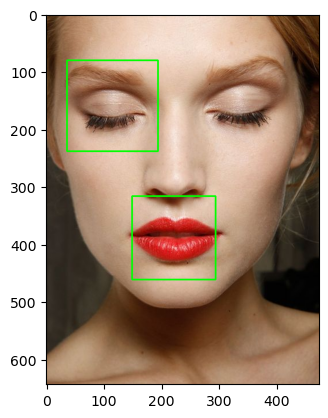

In [292]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("close9.jpg")


FaceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.2, 4)

for (x,y,w,h) in eyes:
     cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255,0), 2)
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# predicting function

eyes not detected
eyes not detected


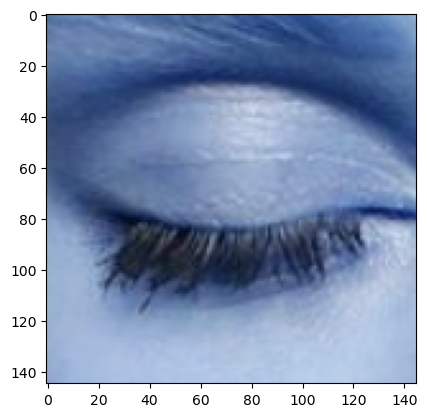

In [293]:
# labels_new = ["yawn", "no_yawn", "Closed", "Open"]

img = cv2.imread("close9.jpg")

eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.4, 1)



IMG_SIZE = 145

# def prepare(filepath):
for x,y,w,h in eyes:
    
#     img = cv2.imread(filepath)
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) == 0:
        print("eyes not detected")
        
    else:
        for(ex,ey,ew,eh) in eyes:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
        
        
# plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))    
    
img_array = cv2.resize(eyes_roi, (IMG_SIZE, IMG_SIZE))  
img_array = img_array / 255

image = img_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  

# plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))  

plt.imshow(img_array)
img_array.shape


#     resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    
# image = resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    

#     return image


model = tf.keras.models.load_model("drowiness_new7.h5")

In [294]:
img_array.shape

(145, 145, 3)

In [295]:
prediction = model.predict(image)

1/1 [==============================] - 0s 198ms/step


In [296]:
prediction
np.argmax(prediction)

2

# Prediction 
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [120]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare(r"download.jfif")])#closed
np.argmax(prediction)

1/1 [==============================] - 0s 208ms/step


2

In [121]:
prediction = model.predict([prepare(r"s0014_06136_0_0_1_0_1_01.png")])#open
np.argmax(prediction)

1/1 [==============================] - 0s 88ms/step


3

In [122]:
prediction = model.predict([prepare(r"s0014_06136_0_0_1_0_1_01.png")])#open
np.argmax(prediction)

1/1 [==============================] - 0s 81ms/step


3

In [123]:
prediction = model.predict([prepare(r"s0001_00066_0_0_0_0_0_01.png")])#close
np.argmax(prediction)


1/1 [==============================] - 0s 86ms/step


2

In [ ]:
# import cv2
# import numpy as np

# from keras.models import load_model
# from keras.utils.image_utils import img_to_array
# from playsound import playsound
# from threading import Thread


# def start_alarm(sound):
#     """Play the alarm sound"""
#     playsound('alarm.mp3')


# classes = ['Closed', 'Open']
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# left_eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_lefteye_2splits.xml")
# right_eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_righteye_2splits.xml")
# cap = cv2.VideoCapture(0)
# model = load_model("drowiness_new7.h5")
# count = 0
# alarm_on = False
# alarm_sound = "alarm.mp3"
# status1 = ''
# status2 = ''

# while True:
#     _, frame = cap.read()
#     height = frame.shape[0]
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 1)
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         left_eye = left_eye_cascade.detectMultiScale(roi_gray)
#         right_eye = right_eye_cascade.detectMultiScale(roi_gray)
#         for (x1, y1, w1, h1) in left_eye:
#             cv2.rectangle(roi_color, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 1)
#             eye1 = roi_color[y1:y1+h1, x1:x1+w1]
#             eye1 = cv2.resize(eye1, (145, 145))
#             eye1 = eye1.astype('float') / 255.0
#             eye1 = img_to_array(eye1)
#             eye1 = np.expand_dims(eye1, axis=0)
#             pred1 = model.predict(eye1)
#             status1=np.argmax(pred1)
#             #print(status1)
#             #status1 = classes[pred1.argmax(axis=-1)[0]]
#             break

#         for (x2, y2, w2, h2) in right_eye:
#             cv2.rectangle(roi_color, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 0), 1)
#             eye2 = roi_color[y2:y2 + h2, x2:x2 + w2]
#             eye2 = cv2.resize(eye2, (145, 145))
#             eye2 = eye2.astype('float') / 255.0
#             eye2 = img_to_array(eye2)
#             eye2 = np.expand_dims(eye2, axis=0)
#             pred2 = model.predict(eye2)
#             status2=np.argmax(pred2)
#             #print(status2)
#             #status2 = classes[pred2.argmax(axis=-1)[0]]
#             break

#         # If the eyes are closed, start counting
#         if status1 == 2 and status2 == 2:
#         #if pred1 == 2 and pred2 == 2:
#             count += 1
#             cv2.putText(frame, "Eyes Closed, Frame count: " + str(count), (10, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
#             # if eyes are closed for 10 consecutive frames, start the alarm
#             if count >= 10:
#                 cv2.putText(frame, "Drowsiness Alert!!!", (100, height-20), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
#                 if not alarm_on:
#                     alarm_on = True
#                     # play the alarm sound in a new thread
#                     t = Thread(target=start_alarm, args=(alarm_sound,))
#                     t.daemon = True
#                     t.start()
#         else:
#             cv2.putText(frame, "Eyes Open", (10, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
#             count = 0
#             alarm_on = False

#     cv2.imshow("Drowsiness Detector", frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

In [4]:
import cv2 
from keras.models import load_model
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
model = load_model("drowiness_new7.h5")

#setting rectangle background to white
rectangle_bgr = (255,255,255)

#black image
img = np.zeros((500,500))

#some text 
text = "some text"

#get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

#make the coords of the box with a small padding of 2 pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2,  text_offset_y - text_height - 2 ))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED )
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness = 1)


cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')
    
    
    
while True:
    ret,frame = cap.read()
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        faces = face_cascade.detectMultiScale(roi_gray)
        if len(faces) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in faces:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
                
    final_image = cv2.resize(face_roi, (145, 145))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    predictions = model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (predictions == 2):
        status = "Eyes closed"
        x1, y1, w1, h1 = 0,0,175,75
        #Draw rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
        
    else:
        status = "open eyes"
        x1, y1, w1, h1 = 0,0,175,75
        #Draw rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
        
        

    cv2.imshow(video, frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
        
        
        
                    
    
                
        


OSError: No file or directory found at drowiness_new7.h5

In [2]:
# importing necessary library
import cv2 as cv
import numpy as np
from keras.models import load_model
from keras.utils.image_utils import img_to_array
from playsound import playsound
from threading import Thread

#loading cascading class
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

#loading model 
model = load_model("drowiness_new7.h5")

#capturing video through webcam
video_capture = cv.VideoCapture(0)

count = 0
status = ''
alarm_on = False
alarm_sound = "alarm.mp3"


def start_alarm(sound):
    """Play the alarm sound"""
    playsound('alarm.mp3')


# reading all frames through webcam
while True:
    ret, frame = video_capture.read()
    height = frame.shape[0]
    #video feed should be flipped so that it appears mirror like
    frame = cv.flip(frame,1)
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x,y,w,h) in faces:
        cv.rectangle(frame, (x,y), (x+w,y+h), (255,255,255), 2)
        region_gray = gray[y:y+h, x:x+w]
        region_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(region_gray)

        for (x1, y1, w1, h1) in eyes:
            cv2.rectangle(region_color, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 1)
            eye = region_color[y1:y1+h1, x1:x1+w1]
            eye = cv2.resize(eye, (145, 145))
            eye = eye.astype('float') / 255.0
            eye = img_to_array(eye)
            eye = np.expand_dims(eye, axis=0)
            pred = model.predict(eye)
            status=np.argmax(pred)
            break
            
        #if eyes are closed:
        if status == 2:
            count+= 1
            cv2.putText(frame, "Eyes Closed, Frame count: " + str(count), (10, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
            # if eyes are closed for 10 consecutive frames, start the alarm
            if count >= 10:
                cv2.putText(frame, "Drowsiness Alert!!!", (100, height-20), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
                if not alarm_on:
                    alarm_on = True
                    # play the alarm sound in a new thread
                    t = Thread(target=start_alarm, args=(alarm_sound,))
                    t.daemon = True
                    t.start()
                    
                    
                    
        else:
            cv2.putText(frame, "Eyes Open", (10, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
            count = 0
            alarm_on = False

    cv.imshow('Video', frame)
    if(cv.waitKey(1) & 0xFF == ord('q')):
        break

#release video capture
video_capture.release()
cv.waitKey(0)
cv.destroyAllWindows()

OSError: No file or directory found at drowiness_new7.h5